In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

SIFT found 908 keypoints
Each keypoint has a 128-dimensional descriptor


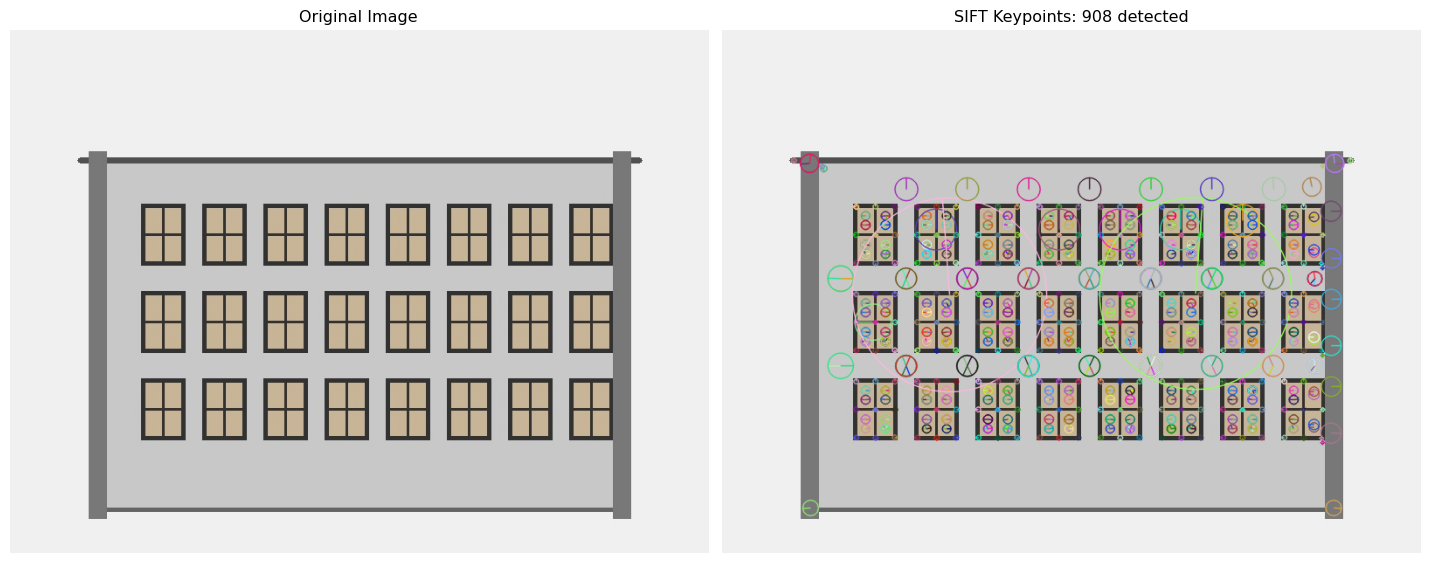


First 5 keypoints properties:
Keypoint 1: position=(81.9, 150.3), size=5.4, angle=101.4°
Keypoint 2: position=(81.9, 150.3), size=5.4, angle=257.9°
Keypoint 3: position=(99.7, 153.4), size=21.1, angle=174.5°
Keypoint 4: position=(99.7, 153.4), size=21.1, angle=278.9°
Keypoint 5: position=(100.9, 548.0), size=18.1, angle=175.7°


In [2]:
#| eval: true
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# Load a sample image with clear features (architectural scene)
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Load our synthetic architectural image with clear features
img = cv2.imread('images/architecture-features.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

print(f"SIFT found {len(keypoints)} keypoints")
print(f"Each keypoint has a {descriptors.shape[1]}-dimensional descriptor")

# Draw keypoints
img_with_keypoints = cv2.drawKeypoints(
    img_rgb, keypoints, None, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display results
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_with_keypoints)
plt.title(f"SIFT Keypoints: {len(keypoints)} detected")
plt.axis('off')

plt.tight_layout()
plt.show()

# Show some keypoint properties
print("\nFirst 5 keypoints properties:")
for i, kp in enumerate(keypoints[:5]):
    print(f"Keypoint {i+1}: position=({kp.pt[0]:.1f}, {kp.pt[1]:.1f}), "
          f"size={kp.size:.1f}, angle={kp.angle:.1f}°")

ORB found 500 keypoints
Each keypoint has a 256-bit binary descriptor


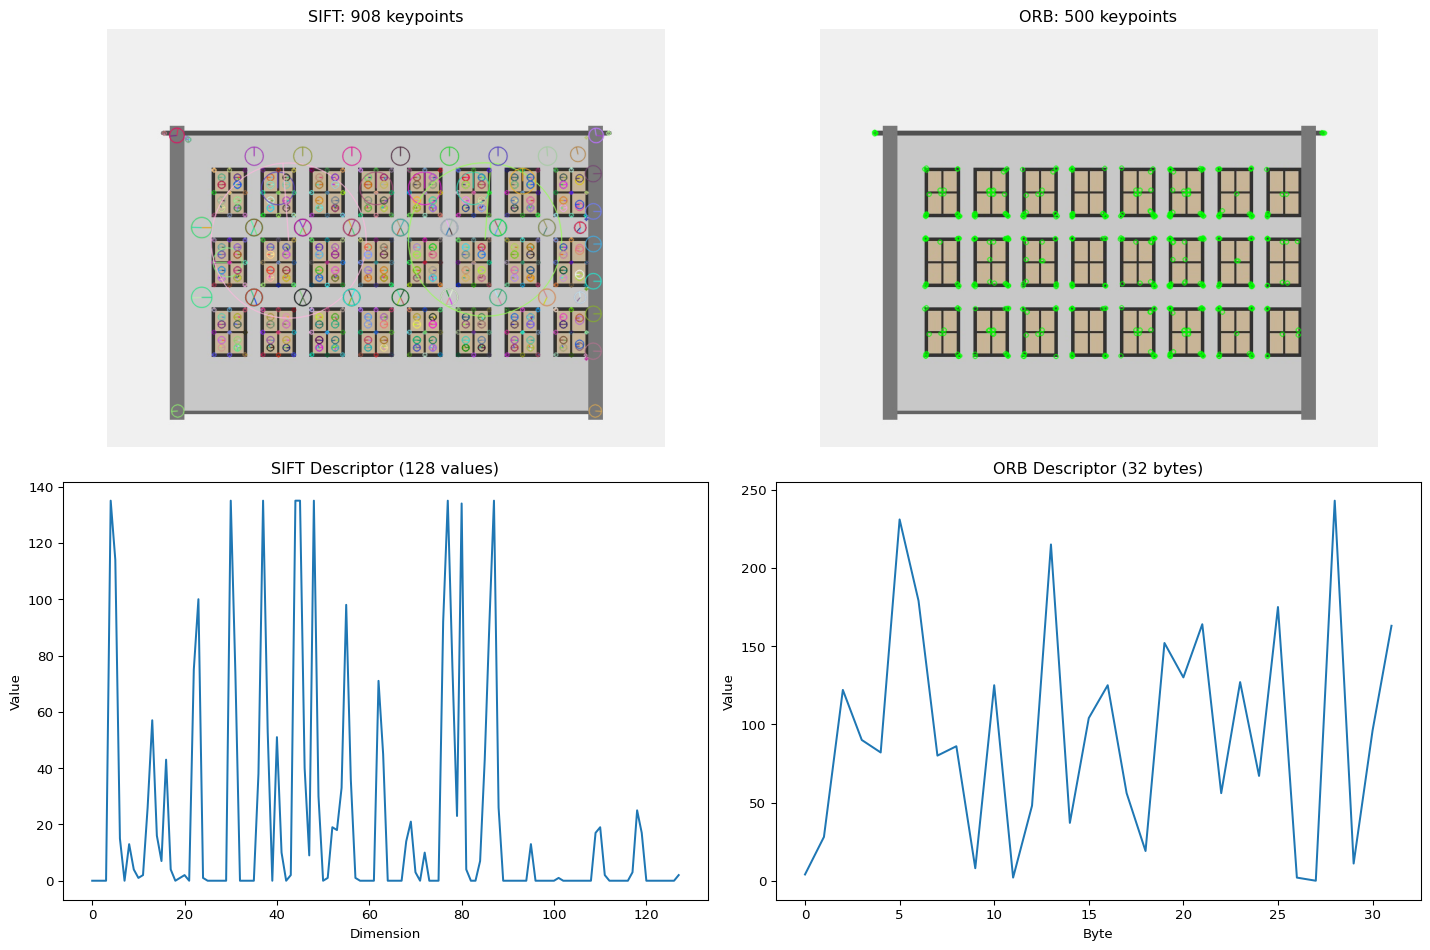

In [3]:
#| eval: true
# Create ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors
orb_kp, orb_desc = orb.detectAndCompute(gray, None)

print(f"ORB found {len(orb_kp)} keypoints")
print(f"Each keypoint has a {orb_desc.shape[1]*8}-bit binary descriptor")

# Draw ORB keypoints
img_orb = cv2.drawKeypoints(img_rgb, orb_kp, None, color=(0, 255, 0), flags=0)

# Compare SIFT vs ORB
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_with_keypoints)
plt.title(f"SIFT: {len(keypoints)} keypoints")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_orb)
plt.title(f"ORB: {len(orb_kp)} keypoints")
plt.axis('off')

# Show descriptor differences
plt.subplot(2, 2, 3)
plt.plot(descriptors[0])
plt.title("SIFT Descriptor (128 values)")
plt.xlabel("Dimension")
plt.ylabel("Value")

plt.subplot(2, 2, 4)
plt.plot(orb_desc[0])
plt.title("ORB Descriptor (32 bytes)")
plt.xlabel("Byte")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

Found 0 good matches out of 908 and 466 keypoints


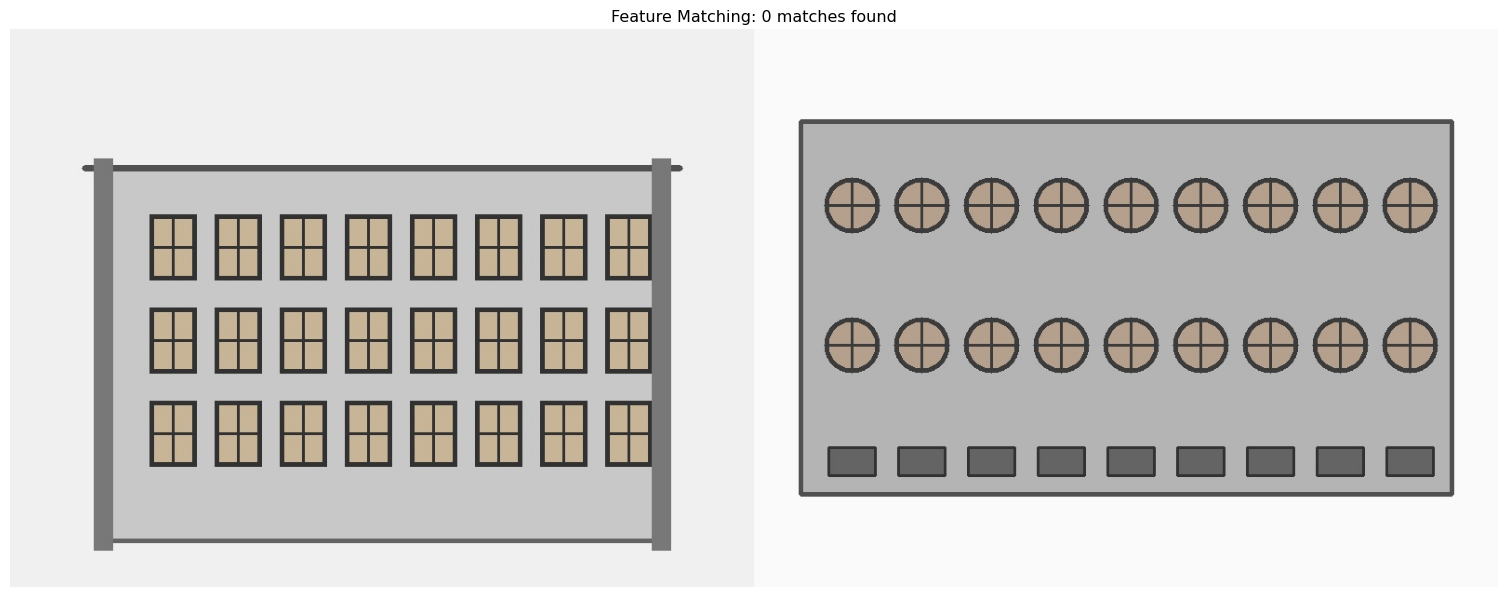


Match quality statistics:
Average distance: nan


/home/hasan/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/home/hasan/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



In [4]:
#| eval: true
# Load a second image (different architectural pattern for matching)
img2 = cv2.imread('images/architecture-features-2.jpg')
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect features in both images
kp1, desc1 = sift.detectAndCompute(gray, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

def match_features(desc1, desc2, ratio_threshold=0.7):
    """Match features using Lowe's ratio test"""
    
    # Brute Force matcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(desc1, desc2, k=2)
    
    # Apply Lowe's ratio test to filter good matches
    good_matches = []
    for match_pair in matches:
        if len(match_pair) == 2:
            m, n = match_pair
            if m.distance < ratio_threshold * n.distance:
                good_matches.append(m)
    
    return good_matches

# Match SIFT features
good_matches = match_features(desc1, desc2)
print(f"Found {len(good_matches)} good matches out of {len(kp1)} and {len(kp2)} keypoints")

# Draw matches
matched_img = cv2.drawMatches(
    img_rgb, kp1,
    img2_rgb, kp2,
    good_matches[:50], None,  # Show top 50 matches
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(20, 10))
plt.imshow(matched_img)
plt.title(f"Feature Matching: {len(good_matches)} matches found")
plt.axis('off')
plt.show()

# Show match quality statistics
distances = [m.distance for m in good_matches]
print(f"\nMatch quality statistics:")
print(f"Average distance: {np.mean(distances):.2f}")
#print(f"Min distance: {np.min(distances):.2f}")
#print(f"Max distance: {np.max(distances):.2f}")

Here's what SIFT 'sees' around each keypoint:


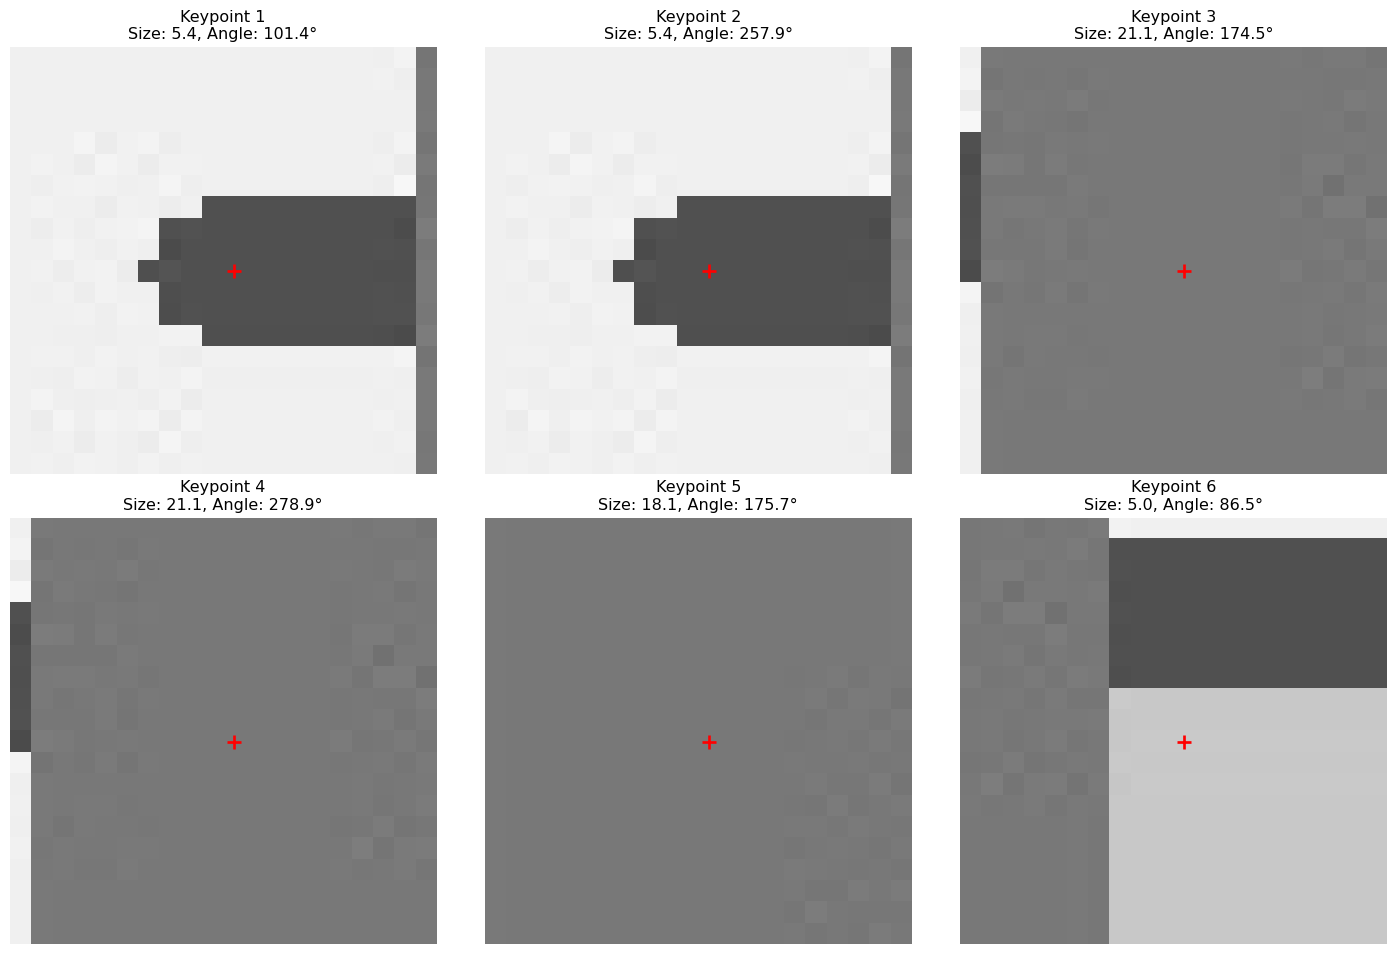

In [5]:
#| eval: true
def visualize_feature_patches(image, keypoints, num_features=6):
    """Visualize patches around keypoints"""
    
    plt.figure(figsize=(15, 10))
    
    for i in range(min(num_features, len(keypoints))):
        kp = keypoints[i]
        
        # Extract patch around keypoint
        x, y = int(kp.pt[0]), int(kp.pt[1])
        size = max(int(kp.size), 20)  # Minimum patch size
        
        # Make sure we don't go out of bounds
        x1 = max(0, x - size//2)
        y1 = max(0, y - size//2)
        x2 = min(image.shape[1], x + size//2)
        y2 = min(image.shape[0], y + size//2)
        
        if x2 > x1 and y2 > y1:  # Valid patch
            patch = image[y1:y2, x1:x2]
            
            # Plot patch
            plt.subplot(2, 3, i + 1)
            if len(patch.shape) == 3:
                plt.imshow(patch)
            else:
                plt.imshow(patch, cmap='gray')
            plt.title(f"Keypoint {i+1}\nSize: {kp.size:.1f}, Angle: {kp.angle:.1f}°")
            plt.axis('off')
            
            # Draw keypoint center
            center_x = (x - x1)
            center_y = (y - y1)
            plt.plot(center_x, center_y, 'r+', markersize=10, markeredgewidth=2)
    
    plt.tight_layout()
    plt.show()

# Visualize some feature patches
print("Here's what SIFT 'sees' around each keypoint:")
visualize_feature_patches(img_rgb, keypoints)

In [6]:
#| eval: true
class SimpleObjectRecognizer:
    def __init__(self, detector_type='ORB'):
        if detector_type == 'ORB':
            self.detector = cv2.ORB_create()
            self.matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        else:  # SIFT
            self.detector = cv2.SIFT_create()
            self.matcher = cv2.BFMatcher()
        
        self.detector_type = detector_type
        self.reference_objects = {}
    
    def add_reference_object(self, name, image):
        """Add a reference object to recognize"""
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        else:
            gray = image
            
        keypoints, descriptors = self.detector.detectAndCompute(gray, None)
        
        if descriptors is not None:
            self.reference_objects[name] = {
                'keypoints': keypoints,
                'descriptors': descriptors,
                'image': image
            }
            print(f"Added '{name}' with {len(keypoints)} keypoints")
        else:
            print(f"No features found in '{name}'")
    
    def recognize_objects(self, scene_image, min_matches=10):
        """Find reference objects in a scene"""
        if len(scene_image.shape) == 3:
            scene_gray = cv2.cvtColor(scene_image, cv2.COLOR_RGB2GRAY)
        else:
            scene_gray = scene_image
            
        scene_kp, scene_desc = self.detector.detectAndCompute(scene_gray, None)
        
        if scene_desc is None:
            return []
        
        results = []
        
        for obj_name, obj_data in self.reference_objects.items():
            # Match features
            if self.detector_type == 'ORB':
                matches = self.matcher.match(obj_data['descriptors'], scene_desc)
                matches = sorted(matches, key=lambda x: x.distance)
                good_matches = matches[:min(50, len(matches))]
            else:  # SIFT with ratio test
                matches = self.matcher.knnMatch(obj_data['descriptors'], scene_desc, k=2)
                good_matches = []
                for match_pair in matches:
                    if len(match_pair) == 2:
                        m, n = match_pair
                        if m.distance < 0.7 * n.distance:
                            good_matches.append(m)
            
            if len(good_matches) >= min_matches:
                confidence = min_matches / len(good_matches) if len(good_matches) > 0 else 0
                results.append({
                    'name': obj_name,
                    'matches': len(good_matches),
                    'confidence': confidence,
                    'good_matches': good_matches,
                    'scene_keypoints': scene_kp,
                    'obj_keypoints': obj_data['keypoints']
                })
        
        return sorted(results, key=lambda x: x['matches'], reverse=True)

# Example usage with architectural features
recognizer = SimpleObjectRecognizer('SIFT')

# Add reference objects (crop distinctive parts of images)
# For demo, we'll use the same image as reference
reference_crop = img_rgb[100:400, 200:500]  # Crop a distinctive building section
recognizer.add_reference_object("Building Section", reference_crop)

# Try to find it in a scene
recognition_results = recognizer.recognize_objects(img2_rgb, min_matches=5)

if recognition_results:
    result = recognition_results[0]
    
    plt.figure(figsize=(15, 8))
    
    plt.subplot(1, 2, 1)
    plt.imshow(reference_crop)
    plt.title("Reference Object")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2_rgb)
    plt.title(f"Scene - Found {result['matches']} matches")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Recognition Results:")
    for result in recognition_results:
        print(f"- Found '{result['name']}' with {result['matches']} matches")
else:
    print("No objects recognized in the scene")

Added 'Building Section' with 295 keypoints
No objects recognized in the scene


Comparing feature detectors on architectural scene:


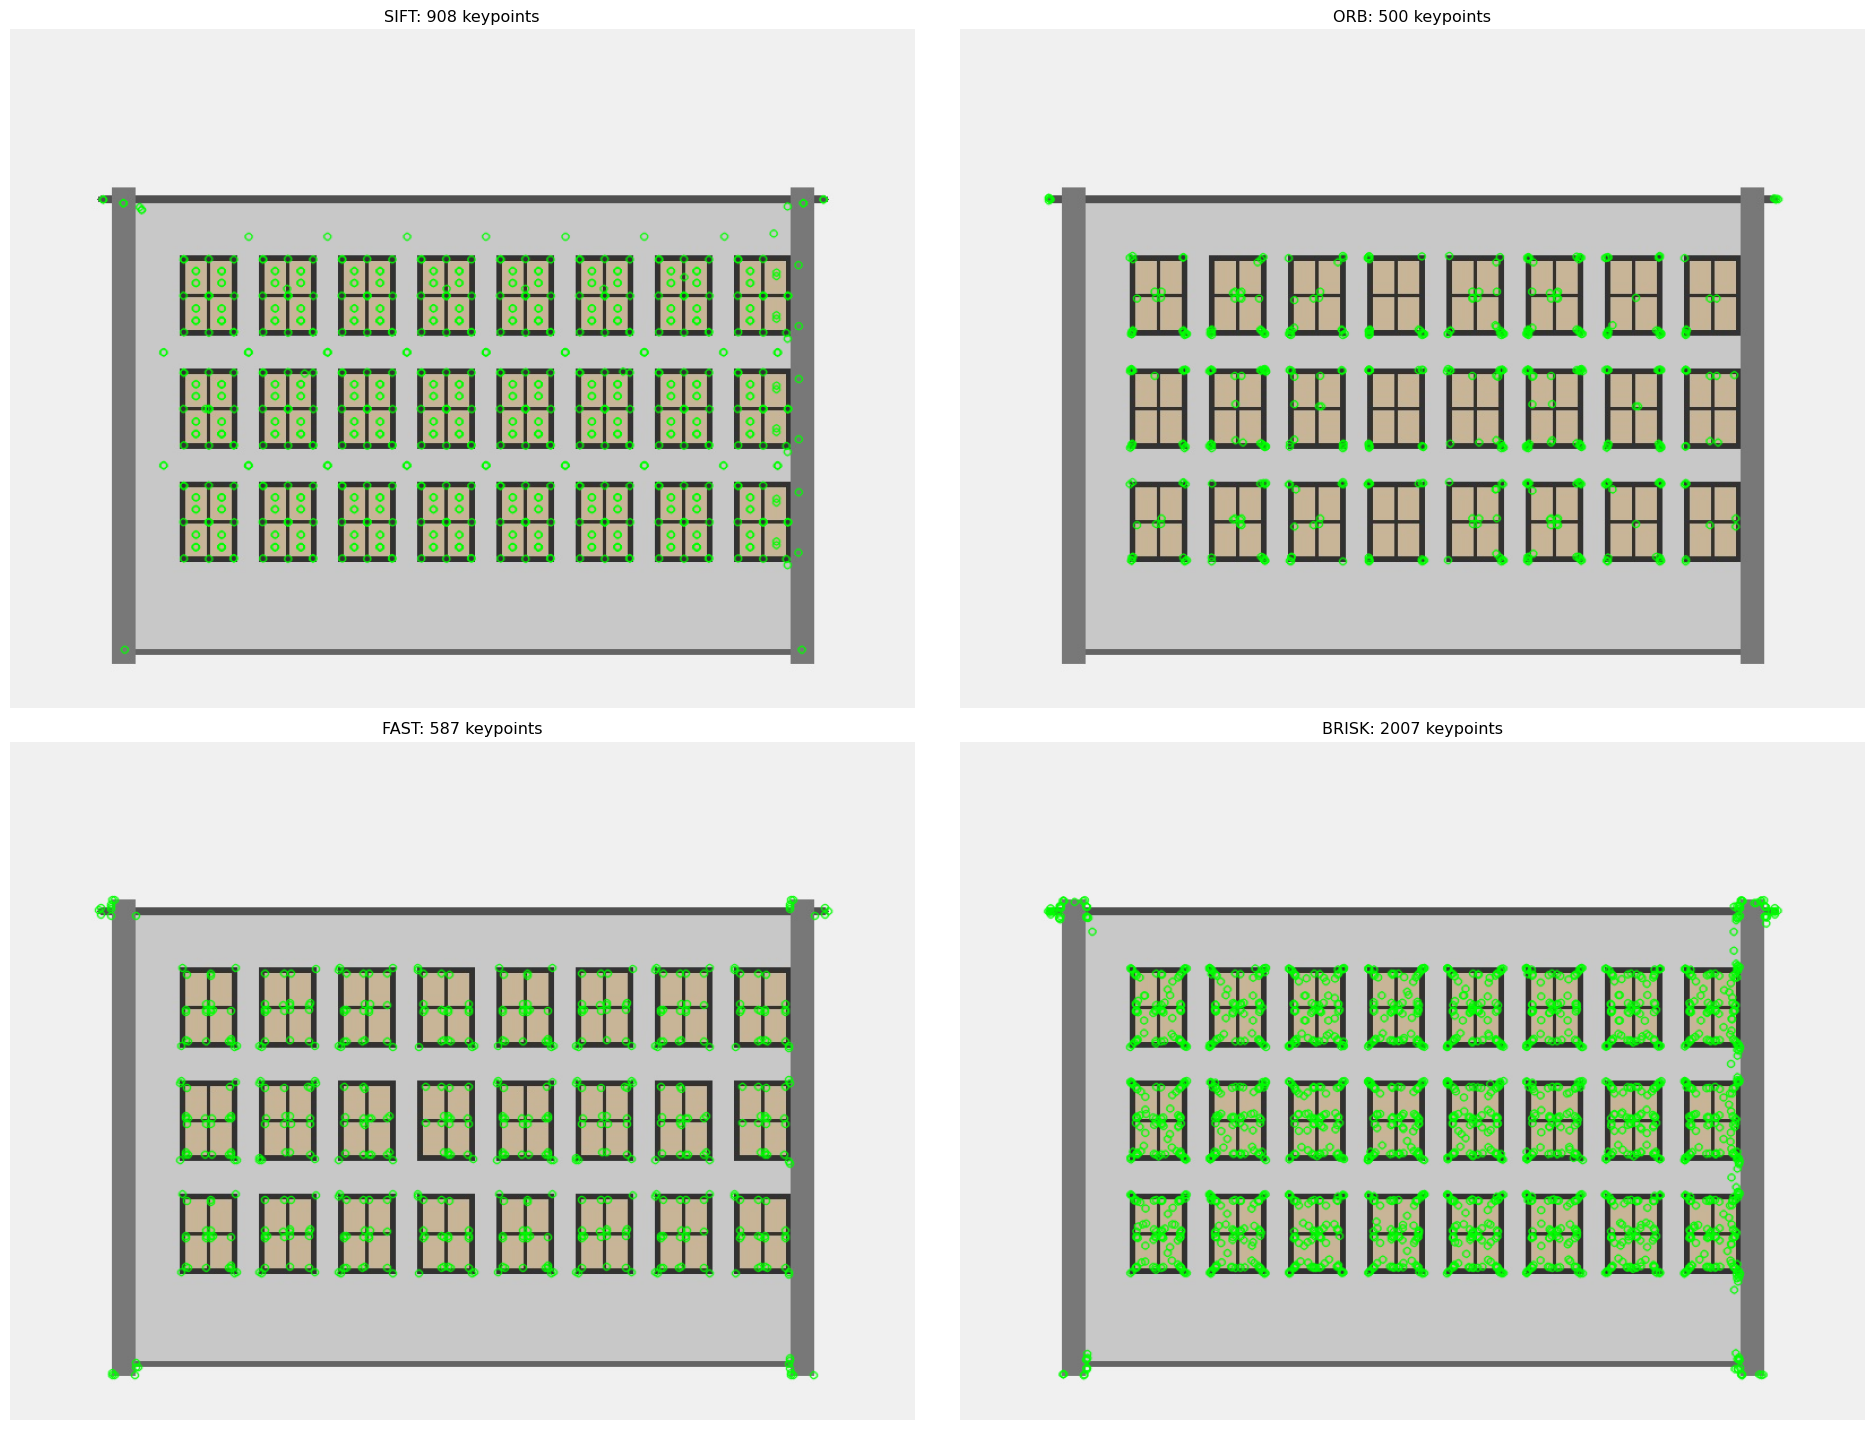

Feature Detector Comparison:
------------------------------------------------------------
Detector   | Keypoints  | Descriptors  | Speed   
------------------------------------------------------------
SIFT       | 908        | ✓            | Slow    
ORB        | 500        | ✓            | Fast    
FAST       | 587        | ✗            | Fast    
BRISK      | 2007       | ✓            | Slow    


In [7]:
#| eval: true
def compare_feature_detectors(image):
    """Compare different feature detection algorithms"""
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    
    # Different detectors
    detectors = {
        'SIFT': cv2.SIFT_create(),
        'ORB': cv2.ORB_create(),
        'FAST': cv2.FastFeatureDetector_create(),
        'BRISK': cv2.BRISK_create()
    }
    
    results = {}
    
    plt.figure(figsize=(20, 15))
    
    for i, (name, detector) in enumerate(detectors.items()):
        # Detect keypoints
        if name in ['SIFT', 'ORB', 'BRISK']:
            keypoints, descriptors = detector.detectAndCompute(gray, None)
        else:  # FAST doesn't compute descriptors
            keypoints = detector.detect(gray, None)
            descriptors = None
        
        # Draw keypoints
        img_with_kp = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
        
        # Store results
        results[name] = {
            'keypoints': len(keypoints),
            'has_descriptors': descriptors is not None,
            'speed': 'Fast' if name in ['FAST', 'ORB'] else 'Slow'
        }
        
        # Plot
        plt.subplot(2, 2, i + 1)
        plt.imshow(img_with_kp)
        plt.title(f"{name}: {len(keypoints)} keypoints")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print comparison table
    print("Feature Detector Comparison:")
    print("-" * 60)
    print(f"{'Detector':<10} | {'Keypoints':<10} | {'Descriptors':<12} | {'Speed':<8}")
    print("-" * 60)
    for name, data in results.items():
        desc_info = "✓" if data['has_descriptors'] else "✗"
        print(f"{name:<10} | {data['keypoints']:<10} | {desc_info:<12} | {data['speed']:<8}")
    
    return results

# Compare detectors on architectural image
print("Comparing feature detectors on architectural scene:")
comparison_results = compare_feature_detectors(img_rgb)

Analyzing feature matches between architectural images:


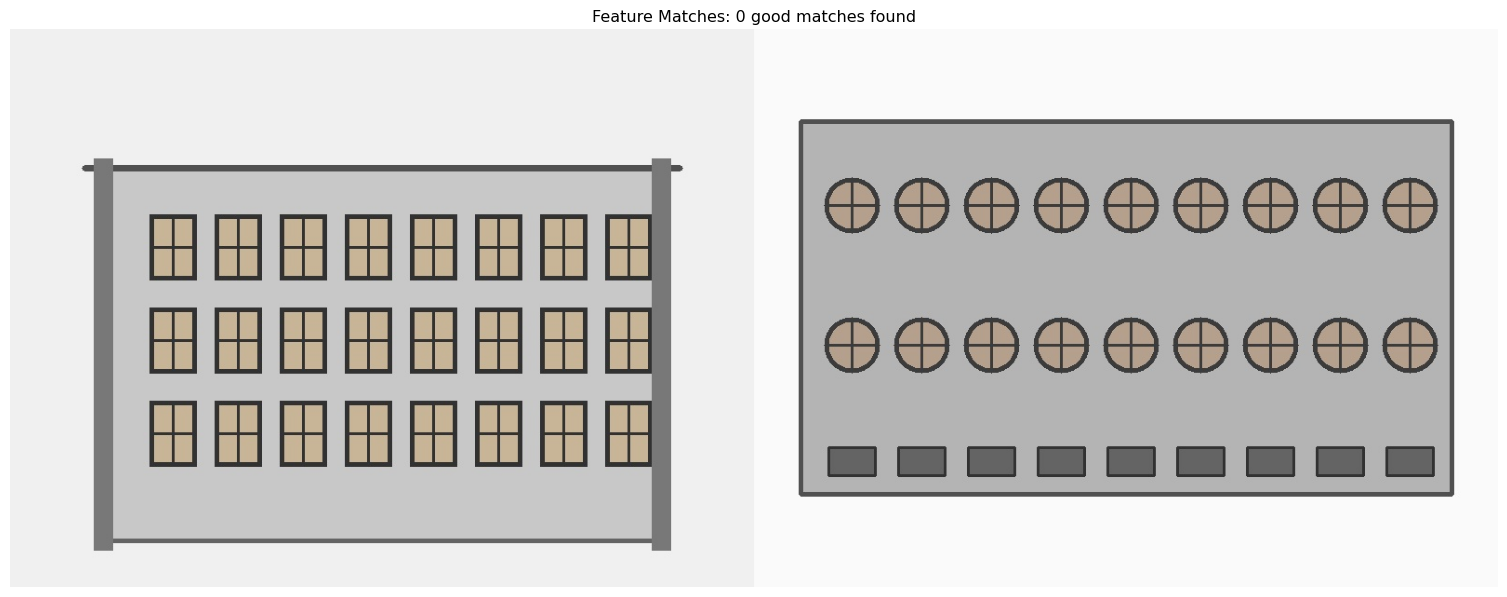

❌ Not enough matches for reliable stitching
💡 Try with images that have more overlap or distinctive features


In [8]:
#| eval: true
class PanoramaStitcher:
    def __init__(self):
        self.detector = cv2.SIFT_create()
        self.matcher = cv2.BFMatcher()
    
    def find_homography(self, img1, img2):
        """Find transformation between two images"""
        # Convert to grayscale
        gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY) if len(img1.shape) == 3 else img1
        gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY) if len(img2.shape) == 3 else img2
        
        # Find keypoints and descriptors
        kp1, desc1 = self.detector.detectAndCompute(gray1, None)
        kp2, desc2 = self.detector.detectAndCompute(gray2, None)
        
        if desc1 is None or desc2 is None:
            return None, None, 0
        
        # Match features
        matches = self.matcher.knnMatch(desc1, desc2, k=2)
        
        # Filter good matches using Lowe's ratio test
        good_matches = []
        for match_pair in matches:
            if len(match_pair) == 2:
                m, n = match_pair
                if m.distance < 0.7 * n.distance:
                    good_matches.append(m)
        
        if len(good_matches) < 10:
            return None, None, len(good_matches)
        
        # Extract matched points
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        
        # Find homography using RANSAC
        homography, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        
        return homography, mask, len(good_matches)
    
    def visualize_matches(self, img1, img2):
        """Visualize feature matches between two images"""
        # Find features
        gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY) if len(img1.shape) == 3 else img1
        gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY) if len(img2.shape) == 3 else img2
        
        kp1, desc1 = self.detector.detectAndCompute(gray1, None)
        kp2, desc2 = self.detector.detectAndCompute(gray2, None)
        
        if desc1 is None or desc2 is None:
            print("Could not find features in one or both images")
            return
        
        # Match and filter
        matches = self.matcher.knnMatch(desc1, desc2, k=2)
        good_matches = []
        for match_pair in matches:
            if len(match_pair) == 2:
                m, n = match_pair
                if m.distance < 0.7 * n.distance:
                    good_matches.append(m)
        
        # Draw matches
        matched_img = cv2.drawMatches(
            img1, kp1, img2, kp2, good_matches[:30], None,
            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
        )
        
        plt.figure(figsize=(20, 10))
        plt.imshow(matched_img)
        plt.title(f"Feature Matches: {len(good_matches)} good matches found")
        plt.axis('off')
        plt.show()
        
        return len(good_matches)

# Test the panorama stitcher
stitcher = PanoramaStitcher()

print("Analyzing feature matches between architectural images:")
num_matches = stitcher.visualize_matches(img_rgb, img2_rgb)

if num_matches and num_matches > 10:
    print(f"✅ Great! Found {num_matches} matches - perfect for panorama stitching!")
    print("💡 Challenge: Implement the actual image stitching using cv2.warpPerspective")
else:
    print("❌ Not enough matches for reliable stitching")
    print("💡 Try with images that have more overlap or distinctive features")

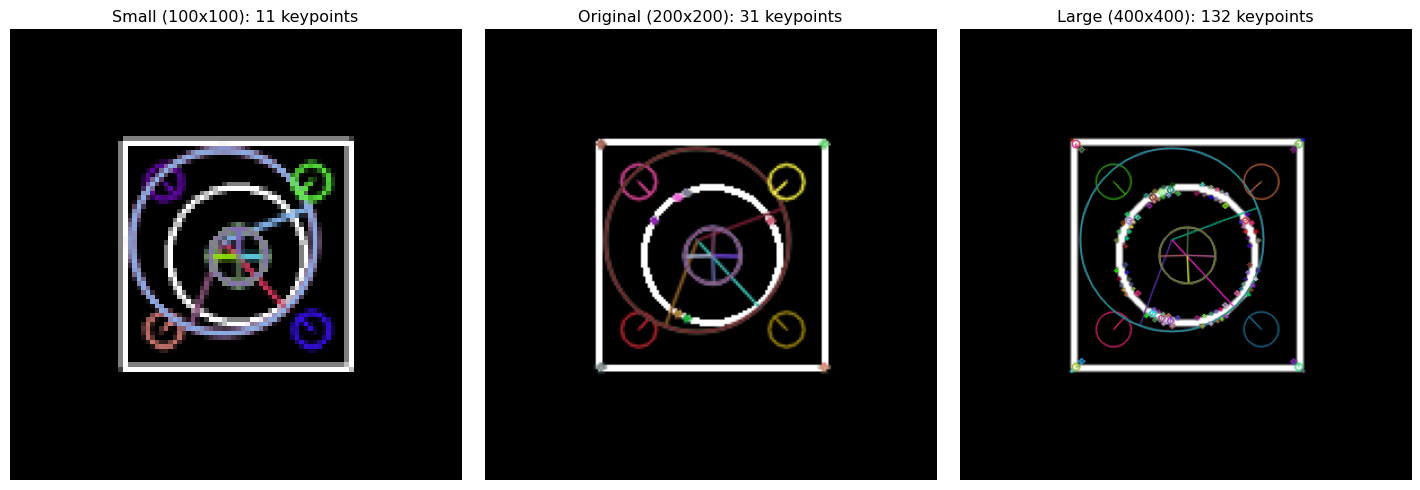

✨ Scale Invariance: SIFT detects similar features at different scales!


In [9]:
#| eval: true
# Demonstrate scale invariance
def show_scale_invariance():
    # Create a simple pattern
    pattern = np.zeros((200, 200), dtype=np.uint8)
    cv2.rectangle(pattern, (50, 50), (150, 150), 255, 2)
    cv2.circle(pattern, (100, 100), 30, 255, 2)
    
    # Scale it
    small_pattern = cv2.resize(pattern, (100, 100))
    large_pattern = cv2.resize(pattern, (400, 400))
    
    # Detect features in each
    sift = cv2.SIFT_create()
    
    kp_orig, _ = sift.detectAndCompute(pattern, None)
    kp_small, _ = sift.detectAndCompute(small_pattern, None)
    kp_large, _ = sift.detectAndCompute(large_pattern, None)
    
    # Visualize
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    img_small = cv2.drawKeypoints(cv2.cvtColor(small_pattern, cv2.COLOR_GRAY2RGB), 
                                  kp_small, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_small)
    plt.title(f"Small (100x100): {len(kp_small)} keypoints")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    img_orig = cv2.drawKeypoints(cv2.cvtColor(pattern, cv2.COLOR_GRAY2RGB), 
                                 kp_orig, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_orig)
    plt.title(f"Original (200x200): {len(kp_orig)} keypoints")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    img_large = cv2.drawKeypoints(cv2.cvtColor(large_pattern, cv2.COLOR_GRAY2RGB), 
                                  kp_large, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_large)
    plt.title(f"Large (400x400): {len(kp_large)} keypoints")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("✨ Scale Invariance: SIFT detects similar features at different scales!")

show_scale_invariance()

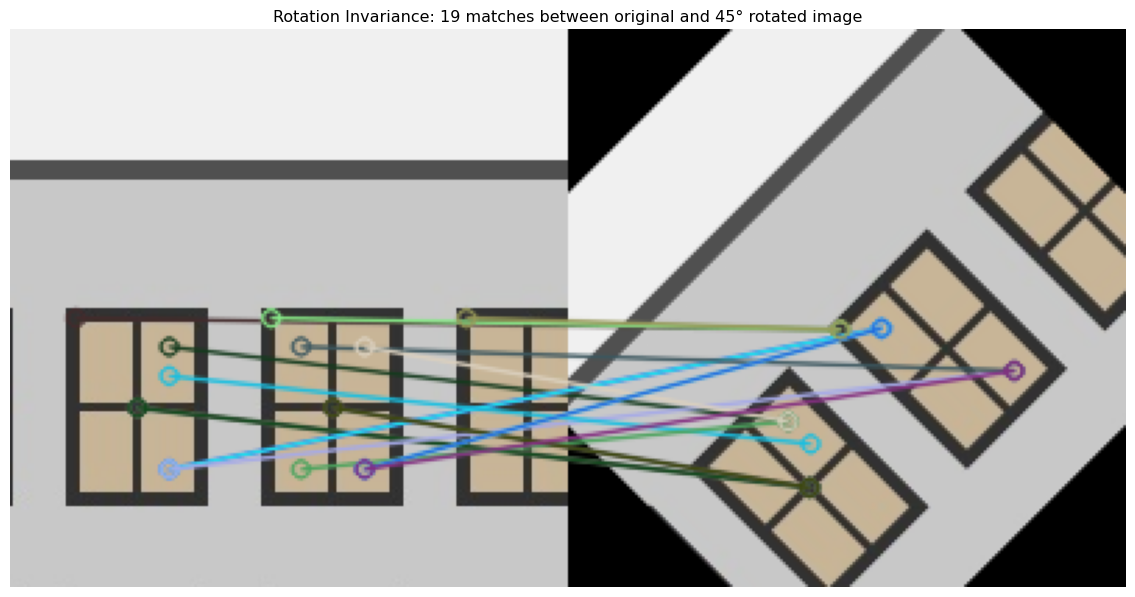

🔄 Rotation Invariance: Found 19 matching features despite 45° rotation!


In [10]:
#| eval: true
# Demonstrate rotation invariance
def show_rotation_invariance():
    # Use a small crop with clear features
    if 'img_rgb' in globals():
        test_img = img_rgb[100:300, 200:400]
    else:
        # Create a test pattern if main image not available
        test_img = np.zeros((200, 200, 3), dtype=np.uint8)
        cv2.rectangle(test_img, (50, 50), (150, 150), (255, 255, 255), 2)
        cv2.circle(test_img, (100, 100), 30, (255, 255, 255), 2)
    
    # Rotate the image
    center = (test_img.shape[1]//2, test_img.shape[0]//2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated_img = cv2.warpAffine(test_img, rotation_matrix, (test_img.shape[1], test_img.shape[0]))
    
    # Detect features
    sift = cv2.SIFT_create()
    
    gray_orig = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
    gray_rot = cv2.cvtColor(rotated_img, cv2.COLOR_RGB2GRAY)
    
    kp_orig, desc_orig = sift.detectAndCompute(gray_orig, None)
    kp_rot, desc_rot = sift.detectAndCompute(gray_rot, None)
    
    # Match features
    if desc_orig is not None and desc_rot is not None:
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(desc_orig, desc_rot, k=2)
        good_matches = []
        for match_pair in matches:
            if len(match_pair) == 2:
                m, n = match_pair
                if m.distance < 0.7 * n.distance:
                    good_matches.append(m)
        
        # Visualize
        matched_img = cv2.drawMatches(
            test_img, kp_orig, rotated_img, kp_rot, good_matches, None,
            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
        )
        
        plt.figure(figsize=(15, 8))
        plt.imshow(matched_img)
        plt.title(f"Rotation Invariance: {len(good_matches)} matches between original and 45° rotated image")
        plt.axis('off')
        plt.show()
        
        print(f"🔄 Rotation Invariance: Found {len(good_matches)} matching features despite 45° rotation!")
    else:
        print("Could not detect enough features for matching")

show_rotation_invariance()